In [164]:
import numpy as np

In [165]:
# x가 1일 때 y=300
# x가 2일 때 y=500
# y = w * x + b 라는 모델을 가정했을 때
# 이 데이터셋의 w와 b를 구해봅시다.

In [166]:
x_train = np.array([1., 2.])
y_train = np.array([300., 500.])

In [167]:
# 손실함수(loss function == cost function비용함수)

def compute_cost(x, y, w, b):
    m = x.shape[0]  # 2
    cost = 0

    for i in range(m):
        y_hat = w * x[i] + b
        cost += (y[i] - y_hat) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [168]:
compute_cost(x_train, y_train, 200, 50)

1250.0

In [169]:
compute_cost(x_train, y_train, 200, 100)

0.0

In [170]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]  # 2
    dw = 0
    db = 0

    for i in range(m):
        y_hat = w * x[i] + b
        dw_i = (y_hat - y[i]) * x[i]
        db_i = y_hat - y[i]
        dw += dw_i
        db += db_i
    dw /= m
    db /= m

    return dw, db

In [171]:
compute_gradient(x_train, y_train, 200, 100)

(0.0, 0.0)

In [172]:
compute_gradient(x_train, y_train, 200, 101)

(1.5, 1.0)

In [173]:
compute_gradient(x_train, y_train, 200, 99)

(-1.5, -1.0)

In [187]:
import math


def gradient_descent(x, y, w_in, b_in, alpha, num_iter, cost_func, grad_func):
    loss_history = []
    param_history = []
    w = w_in
    b = b_in

    for i in range(num_iter):
        dw, db = grad_func(x, y, w, b)
        w = w - dw * alpha
        b = b - db * alpha

        if i < 100000:
            loss_history.append(cost_func(x, y, w, b))
            param_history.append([w, b])

        if i % math.ceil(num_iter / 10) == 0:
            print(
                f"Iteration {i}: Cost {loss_history[-1]:0.2e}, dw: {dw:0.3e}, db: {db:0.3e}, w: {w:0.3e}, b: {b:0.3e}")

        # if len(loss_history) > 2 and loss_history[-2] - loss_history[-1] <= 1e-5:
        #     print(f"iteration complete({i} times)")
        #     break

    return w, b, loss_history, param_history

In [175]:
w_init = 0
b_init = 0

epochs = 10000
learning_rate = 1.0e-2

w_final, b_final, loss_hist, param_hist = \
    gradient_descent(x_train, y_train, w_init, b_init, learning_rate, epochs, compute_cost, compute_gradient)

Iteration 0: Cost 7.93e+04, dw: -6.500e+02, db: -4.000e+02, w: 6.500e+00, b: 4.000e+00
Iteration 1000: Cost 3.41e+00, dw: -3.712e-01, db: 6.007e-01, w: 1.949e+02, b: 1.082e+02
Iteration 2000: Cost 7.93e-01, dw: -1.789e-01, db: 2.895e-01, w: 1.975e+02, b: 1.040e+02
Iteration 3000: Cost 1.84e-01, dw: -8.625e-02, db: 1.396e-01, w: 1.988e+02, b: 1.019e+02
Iteration 4000: Cost 4.28e-02, dw: -4.158e-02, db: 6.727e-02, w: 1.994e+02, b: 1.009e+02
Iteration 5000: Cost 9.95e-03, dw: -2.004e-02, db: 3.243e-02, w: 1.997e+02, b: 1.004e+02
iteration complete(5256 times)


In [176]:
import matplotlib.pyplot as plt

In [177]:
# 1. epoch별 cost양상(0~100)
# 2. epoch별 cost양상(0~10000)

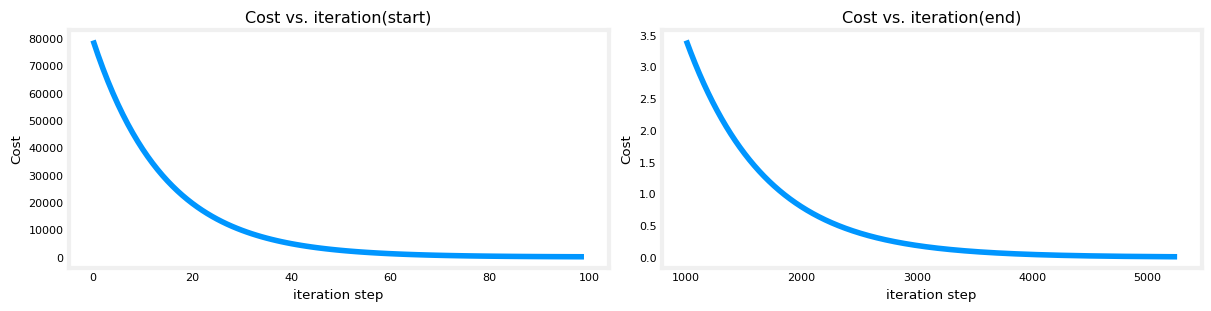

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                               constrained_layout=True,
                               figsize=(12, 3))
ax1.plot(loss_hist[:100])
ax2.plot(1000 + np.arange(len(loss_hist[1000:])),
         loss_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration(end)")
ax1.set_xlabel("iteration step")
ax2.set_xlabel("iteration step")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
plt.show()

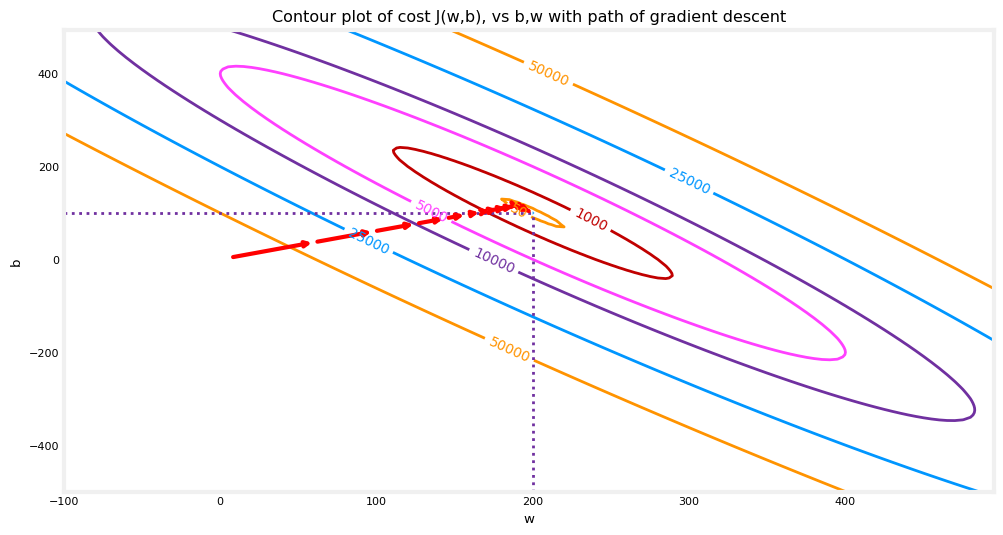

In [179]:
from lab_utils_uni import plt_contour_wgrad, plt_divergence

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, param_hist, ax)

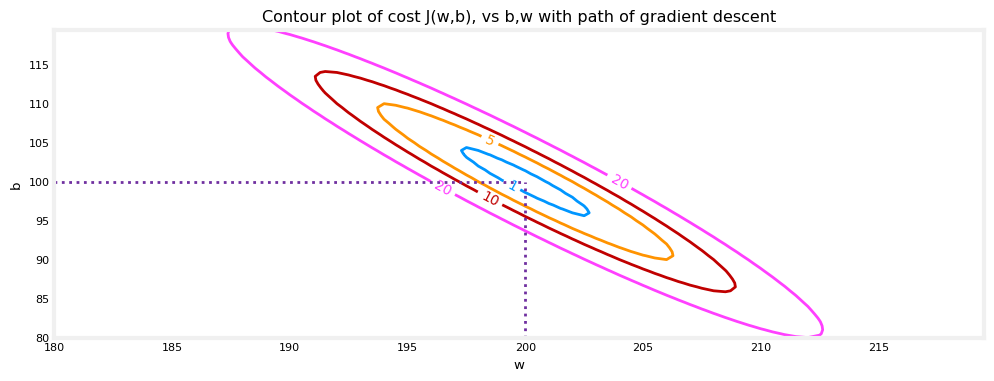

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, param_hist, ax,
                  w_range=[180, 220, 0.5],
                  b_range=[80, 120, 0.5],
                  contours=[1, 5, 10, 20, ],
                  resolution=0.5)

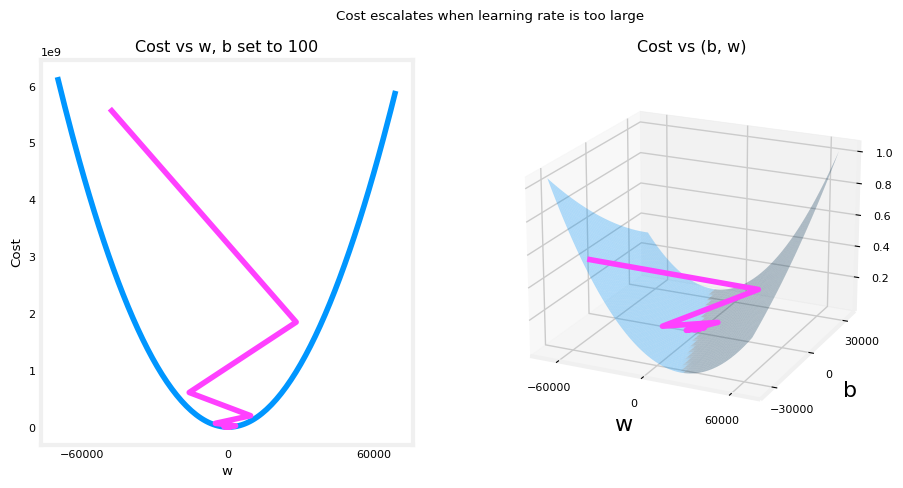

In [190]:
plt_divergence(param_hist, loss_hist, x_train, y_train)

Iteration 0: Cost 2.58e+05, dw: -6.500e+02, db: -4.000e+02, w: 5.200e+02, b: 3.200e+02
Iteration 1: Cost 7.82e+05, dw: 1.130e+03, db: 7.000e+02, w: -3.840e+02, b: -2.400e+02
Iteration 2: Cost 2.37e+06, dw: -1.970e+03, db: -1.216e+03, w: 1.192e+03, b: 7.328e+02
Iteration 3: Cost 7.19e+06, dw: 3.429e+03, db: 2.121e+03, w: -1.551e+03, b: -9.638e+02
Iteration 4: Cost 2.18e+07, dw: -5.974e+03, db: -3.691e+03, w: 3.228e+03, b: 1.989e+03
Iteration 5: Cost 6.62e+07, dw: 1.040e+04, db: 6.431e+03, w: -5.095e+03, b: -3.156e+03
Iteration 6: Cost 2.01e+08, dw: -1.812e+04, db: -1.120e+04, w: 9.402e+03, b: 5.802e+03
Iteration 7: Cost 6.09e+08, dw: 3.156e+04, db: 1.950e+04, w: -1.584e+04, b: -9.801e+03
Iteration 8: Cost 1.85e+09, dw: -5.496e+04, db: -3.397e+04, w: 2.813e+04, b: 1.737e+04
Iteration 9: Cost 5.60e+09, dw: 9.572e+04, db: 5.916e+04, w: -4.845e+04, b: -2.996e+04


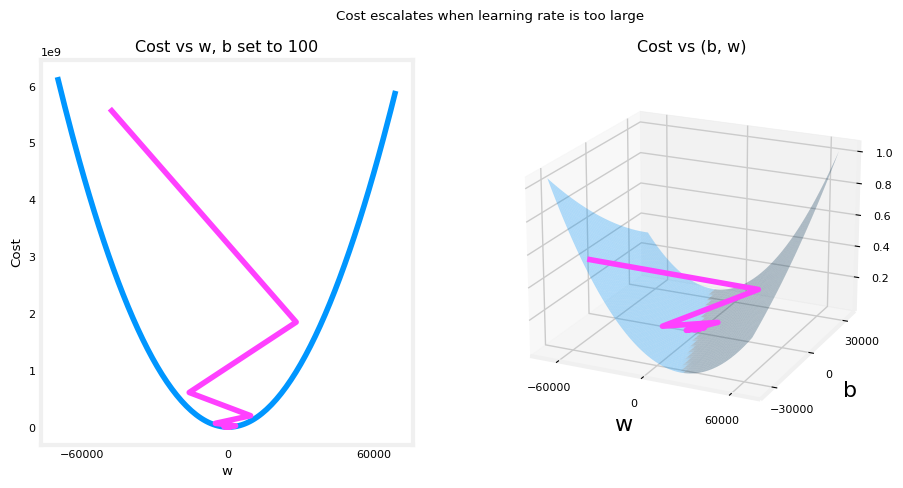

In [191]:
w_init = 0
b_init = 0
epochs = 10
learning_rate = 0.8
w_final, b_final, loss_hist, param_hist = \
    gradient_descent(x_train, y_train, w_init, b_init,
                     learning_rate, epochs,
                     compute_cost, compute_gradient)

plt_divergence(param_hist, loss_hist, x_train, y_train)
plt.show()

In [192]:
# learning rate을 줄이는 경험식
# 3의배수
# 0.01  너무 학습이 오래 걸린다?
# 0.03  3배
# 0.06
# 0.1

# 0.01 발산한다?
# 0.006  줄여보고
# 0.003  적당하다 싶으면 고정.

In [193]:
# 다음 시간에는?

# 분류 모델 Logistic Regression
# MSE 대신 Cross-Entropy를 통해 w, b를 추정해냄.
